# Random Forest Feature Importance

We can use a random forest model to gain insight into which features are closely related.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

base_dir = os.path.join(os.getcwd(), os.pardir)

Get the data.

In [18]:
data_path = os.path.join(base_dir, "data/altered/maps_feature_mapping.csv")
df = pd.read_csv(data_path, index_col="X")
df.head()

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,30.0,59.294132,181.602831,107.0,NaN,NaN,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,NaN,9.0,26.0,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0
4,0.0,NaN,22.0,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0
5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,1.0,2.0,2.0,0.0,0.0


## Random Forest Classification

In order to test for feature importance we need to pick a feature as our target. Initially we shall chose `dep_score`.

We shall seperate `dep_score` from the other features in order to train our random forest.

In [21]:
X_features = df.columns.drop(y_feature)
y_feature = "dep_score"

The data currently has a __lot__ of missing values; this will not work with our random forest classifier.

To get initial result we shall simply impute the mean of the feature into the missing entries. 

This is not optimal but will give initial results for feature importance before more advanced imputation methods.

In [33]:
df_nona = df.copy()

for col in df_nona[X_features]:
    df_nona[col].fillna(df_nona[col].mean(), inplace=True)

df_nona

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,
1,0.228407,3.000000,30.0,59.294132,181.602831,107.000000,1.0,1.0,1.00000,1.000000,...,0.0,1.0,1.0,1.000000,0.000000,1.000000,0.000000,2.000000,0.0,0.0
2,0.228407,9.000000,26.0,61.720509,169.286372,85.000000,1.0,1.0,0.73567,1.581078,...,NaN,1.0,1.0,0.486818,0.522567,1.164757,1.114604,1.105173,0.0,1.0
3,0.228407,3.000000,24.0,61.720509,169.286372,103.672201,1.0,1.0,0.73567,1.581078,...,NaN,1.0,1.0,0.486818,0.522567,1.000000,2.000000,0.000000,1.0,0.0
4,0.000000,5.415882,22.0,49.812426,160.224186,103.672201,1.0,1.0,0.73567,1.581078,...,NaN,1.0,1.0,0.486818,0.000000,1.164757,1.114604,1.105173,1.0,0.0
5,0.000000,8.000000,31.0,62.270030,191.703227,132.000000,1.0,1.0,0.00000,0.000000,...,NaN,1.0,1.0,1.000000,0.000000,1.000000,2.000000,2.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,0.228407,13.000000,27.0,61.720509,169.286372,103.672201,1.0,1.0,0.73567,1.581078,...,NaN,1.0,1.0,0.486818,0.522567,2.000000,2.000000,2.000000,0.0,0.0
13731,0.000000,6.000000,29.0,61.720509,169.286372,103.672201,1.0,1.0,0.00000,1.000000,...,NaN,1.0,1.0,0.486818,0.000000,2.000000,0.000000,0.000000,1.0,0.0
13732,0.228407,21.000000,37.0,58.075832,169.235565,108.000000,1.0,1.0,1.00000,2.000000,...,NaN,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0


Now the NaN values have been filled we can create our features and labels.

In [43]:
X, y = df_nona[X_features], df_nona[y_feature]

For random forest classification we need integer labels, so lets convert `y` to `int` and then fill any missing values with mean imputation.

In [46]:
y.fillna(y.mean(), inplace=True)
y = y.astype('int')
y

X
1        0
2        0
3        0
4        0
5        0
        ..
13730    0
13731    0
13732    0
13733    0
13734    0
Name: dep_score, Length: 13734, dtype: int64

Now we can fit the random forest classifier.

In [47]:
randomforest = RandomForestClassifier(max_depth=10, n_estimators=500)
randomforest.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=500)

## Feature Importance

Now we have trained the random forest we can use the `feature_importances_` attribute to see how each feature contributes to our target feature `dep_score`.

In [66]:
feature_importances = pd.DataFrame(randomforest.feature_importances_, index=X.columns, columns=["Importance"])
feature_importances.sort_values("Importance", ascending=False).head(10)

,Importance
dep_thoughts,0.260162
prim_diag,0.129075
secd_diag,0.087186
has_dep_diag,0.081118
panic_score,0.033774
height_16,0.020215
weight_16,0.019075
iq,0.018163
mat_age,0.014120
agg_score,0.012432


Let's visualise the results.

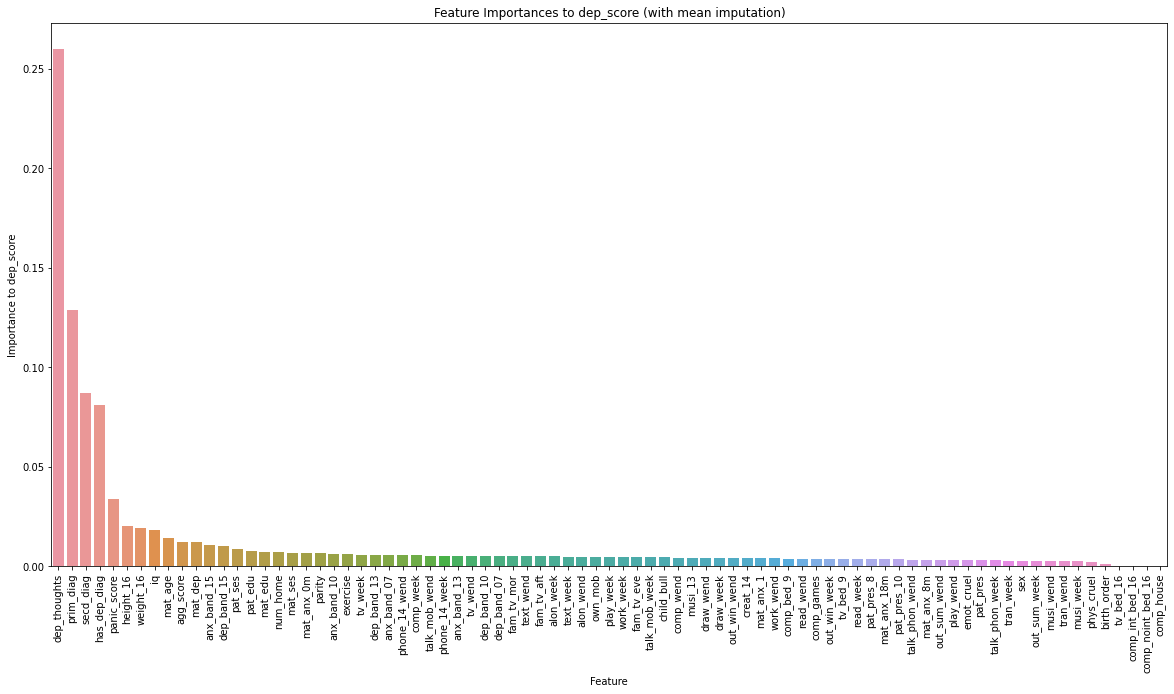

In [101]:
fig_path = os.path.join(base_dir, "figures/rf_feature_importance_mean_imputation.png")
barplt_df = feature_importances.sort_values("Importance", ascending=False).T

fig = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Feature Importances to dep_score (with mean imputation)")
plt.xlabel("Feature")
plt.ylabel("Importance to dep_score")
sns.barplot(data=barplt_df)
plt.savefig(fig_path, bbox_inches="tight", facecolor="white")

`note: due to the imputation method initial results are likely inaccurate.`

Feature importance with XGBoost imputation

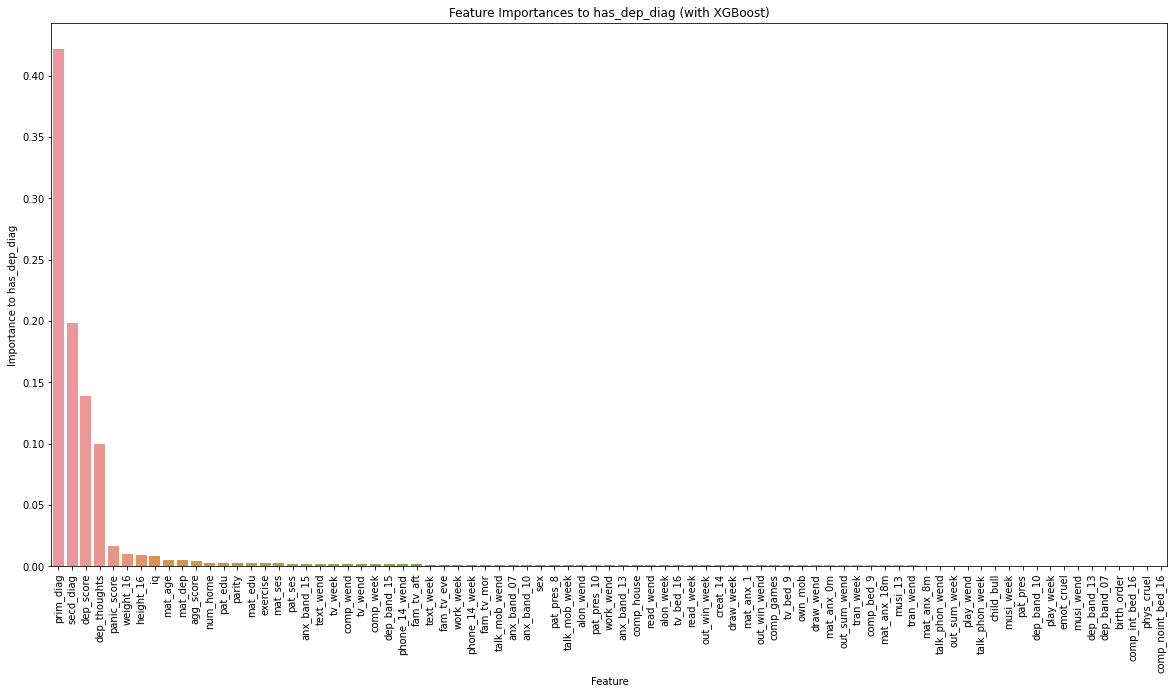

In [10]:
data_path = os.path.join(base_dir, "data/altered/imputed/maps_xgboost_impute.csv")
df = pd.read_csv(data_path, index_col="X")

y_feature = "has_dep_diag"
X_features = df.columns.drop(y_feature)

X, y = df[X_features], df[y_feature]

randomforest = RandomForestClassifier(max_depth=10, n_estimators=500)
randomforest.fit(X, y)

feature_importances = pd.DataFrame(randomforest.feature_importances_, index=X.columns, columns=["Importance"])

fig_path = os.path.join(base_dir, "figures/rf_feature_importance_xgboost_imputation.png")
barplt_df = feature_importances.sort_values("Importance", ascending=False).T

fig = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Feature Importances to has_dep_diag (with XGBoost)")
plt.xlabel("Feature")
plt.ylabel("Importance to has_dep_diag")
sns.barplot(data=barplt_df)
plt.savefig(fig_path, bbox_inches="tight", facecolor="white")

We can do the same for the reduced feature set.

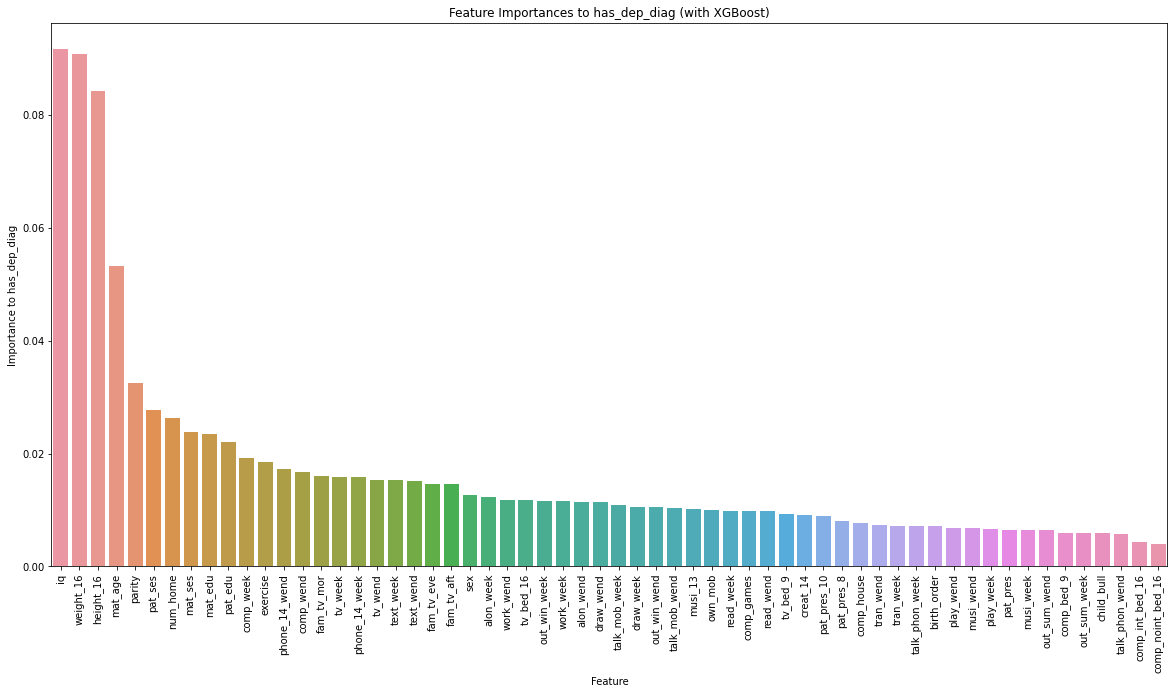

In [9]:
data_path = os.path.join(base_dir, "data/altered/imputed/maps_xgboost_impute.csv")
df = pd.read_csv(data_path, index_col="X")

reduced_features = [
    "comp_bed_9", "mat_age", "weight_16", "height_16", "iq",
    "comp_noint_bed_16", "comp_int_bed_16", "talk_phon_wend", 
    "text_wend", "talk_mob_wend", "comp_wend", "musi_wend", 
    "read_wend", "work_wend", "alon_wend", "draw_wend", 
    "play_wend", "tv_wend", "out_win_wend", "out_sum_wend", 
    "tran_wend", "talk_phon_week", "text_week", "talk_mob_week", 
    "comp_week", "musi_week", "read_week", "work_week", 
    "alon_week", "draw_week", "play_week", "tv_week", "has_dep_diag",
    "out_win_week", "out_sum_week", "tran_week", "pat_pres_10", 
    "pat_pres_8", "pat_pres", "num_home", "pat_ses", "mat_ses", 
    "pat_edu", "mat_edu", "parity", "exercise", "child_bull", 
    "phone_14_wend", "phone_14_week", "musi_13", "tv_bed_9", 
    "own_mob", "comp_house", "tv_bed_16", "creat_14", "comp_games", 
    "fam_tv_eve", "fam_tv_aft", "fam_tv_mor", "sex", "birth_order"
]

y_feature = "has_dep_diag"
X_features = df[reduced_features].columns.drop(y_feature)

X, y = df[X_features], df[y_feature]

randomforest = RandomForestClassifier(max_depth=10, n_estimators=500)
randomforest.fit(X, y)

feature_importances = pd.DataFrame(randomforest.feature_importances_, index=X.columns, columns=["Importance"])

fig_path = os.path.join(base_dir, "figures/rf_feature_importance_xgboost_imputation_reduced.png")
barplt_df = feature_importances.sort_values("Importance", ascending=False).T

fig = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Feature Importances to has_dep_diag (with XGBoost)")
plt.xlabel("Feature")
plt.ylabel("Importance to has_dep_diag")
sns.barplot(data=barplt_df)
plt.savefig(fig_path, bbox_inches="tight", facecolor="white")